# About Dataset
    https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
## Dataset Information
    This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Content
    There are 25 variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)
    
    I emailed the professor who created the data set.
    Below is the response regarding the values used for fields X6:X11
    "This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
    X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
    X2: Gender (1 = male; 2 = female).
    X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
    X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
    X5: Age (year).
    X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:
    -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
    X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
    X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
    Y: client's behavior; Y=0 then not default, Y=1 then default"


# Problem Statement:
    Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

    A machine learning credit card default project is a data science project that aims to predict credit card default risk using machine learning techniques. Credit card default occurs when a credit cardholder fails to make the required minimum payment on their credit card balance for a specified period, usually 30 days or more.

    The objective of the project is to build a predictive model that can assess the probability of a credit card user defaulting on their payments. This model can be valuable to banks, financial institutions, and credit card companies as it helps them identify customers who are more likely to default and take appropriate actions to mitigate the risks.

    
# Approach: 
    The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.


# Results: 
    You have to build a solution that should able to predict the probability of credit default based on credit card owner’s characteristics and payment history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
raw_data = pd.read_csv('UCI_Credit_Card.csv')
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Renaming and Rearranging the columns

In [3]:
raw_data.columns = ['id', 'total_credit', 'sex', 'education', 'marrige', 'age', 'pay1_sep', 'pay2_aug', 'pay3_jul', 'pay4_jun', 'pay5_may', 'pay6_apr', 'bill1_sep', 'bill2_aug', 'bill3_jul', 'bill4_jun', 'bill5_may', 'bill6_apr', 'paid1_sep', 'paid2_aug', 'paid3_jul', 'paid4_jun', 'paid5_may', 'paid6_apr', 'next_month']

In [4]:
raw_data = raw_data[['id', 'total_credit', 'sex', 'education', 'marrige', 'age', 'pay1_sep', 'bill1_sep', 'paid1_sep', 'pay2_aug', 'bill2_aug', 'paid2_aug', 'pay3_jul', 'bill3_jul', 'paid3_jul', 'pay4_jun', 'bill4_jun', 'paid4_jun', 'pay5_may', 'bill5_may', 'paid5_may', 'pay6_apr', 'bill6_apr', 'paid6_apr', 'next_month']]

In [5]:
raw_data.shape

(30000, 25)

### In EDA Need to solve:
    Handle nan values
    Handle duplicate values
    Handle outliers
    Check statistics of data
    Plot graphs

In [6]:
for i in raw_data.columns:
    print(f'{i} has nan values {raw_data[i].isna().sum()}')

id has nan values 0
total_credit has nan values 0
sex has nan values 0
education has nan values 0
marrige has nan values 0
age has nan values 0
pay1_sep has nan values 0
bill1_sep has nan values 0
paid1_sep has nan values 0
pay2_aug has nan values 0
bill2_aug has nan values 0
paid2_aug has nan values 0
pay3_jul has nan values 0
bill3_jul has nan values 0
paid3_jul has nan values 0
pay4_jun has nan values 0
bill4_jun has nan values 0
paid4_jun has nan values 0
pay5_may has nan values 0
bill5_may has nan values 0
paid5_may has nan values 0
pay6_apr has nan values 0
bill6_apr has nan values 0
paid6_apr has nan values 0
next_month has nan values 0


### Id columns is not needed for my model

In [7]:
raw_data.drop('id', inplace=True, axis=1)

### sex is nominal variable so it should not be encoded as ordinal variables

In [8]:
raw_data['sex'] = raw_data['sex'].map({1: 'M', 2: 'F'})

### EDUCATION have multiple others variable

In [9]:
raw_data['education'] = np.where(raw_data['education'].isin([0,5,6]), 4, raw_data['education'])

### MARRIAGE is not ordinal value so i am converting it into categorical

In [10]:
raw_data['marrige'] = raw_data['marrige'].map({1: 'married', 2: 'single', 3: 'divorced', 0: 'others'})

### Numerical, Categorical and Target Column

In [11]:
numerical_features = [i for i in raw_data.columns if raw_data[i].dtype != 'O' and i != 'next_month']
categorical_features = [i for i in raw_data.columns if raw_data[i].dtype == 'O']

In [12]:
raw_data[numerical_features].describe()

,total_credit,education,age,pay1_sep,bill1_sep,paid1_sep,pay2_aug,bill2_aug,paid2_aug,pay3_jul,bill3_jul,paid3_jul,pay4_jun,bill4_jun,paid4_jun,pay5_may,bill5_may,paid5_may,pay6_apr,bill6_apr,paid6_apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.842267,35.485500,-0.016700,51223.330900,5663.580500,-0.133767,49179.075167,5.921163e+03,-0.166200,4.701315e+04,5225.68150,-0.220667,43262.948967,4826.076867,-0.266200,40311.400967,4799.387633,-0.291100,38871.760400,5215.502567
std,129747.661567,0.744494,9.217904,1.123802,73635.860576,16563.280354,1.197186,71173.768783,2.304087e+04,1.196868,6.934939e+04,17606.96147,1.169139,64332.856134,15666.159744,1.133187,60797.155770,15278.305679,1.149988,59554.107537,17777.465775
min,10000.000000,1.000000,21.000000,-2.000000,-165580.000000,0.000000,-2.000000,-69777.000000,0.000000e+00,-2.000000,-1.572640e+05,0.00000,-2.000000,-170000.000000,0.000000,-2.000000,-81334.000000,0.000000,-2.000000,-339603.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,3558.750000,1000.000000,-1.000000,2984.750000,8.330000e+02,-1.000000,2.666250e+03,390.00000,-1.000000,2326.750000,296.000000,-1.000000,1763.000000,252.500000,-1.000000,1256.000000,117.750000
50%,140000.000000,2.000000,34.000000,0.000000,22381.500000,2100.000000,0.000000,21200.000000,2.009000e+03,0.000000,2.008850e+04,1800.00000,0.000000,19052.000000,1500.000000,0.000000,18104.500000,1500.000000,0.000000,17071.000000,1500.000000
75%,240000.000000,2.000000,41.000000,0.000000,67091.000000,5006.000000,0.000000,64006.250000,5.000000e+03,0.000000,6.016475e+04,4505.00000,0.000000,54506.000000,4013.250000,0.000000,50190.500000,4031.500000,0.000000,49198.250000,4000.000000
max,1000000.000000,4.000000,79.000000,8.000000,964511.000000,873552.000000,8.000000,983931.000000,1.684259e+06,8.000000,1.664089e+06,896040.00000,8.000000,891586.000000,621000.000000,8.000000,927171.000000,426529.000000,8.000000,961664.000000,528666.000000


In [13]:
raw_data[categorical_features].describe()

,sex,marrige
count,30000,30000
unique,2,4
top,F,single
freq,18112,15964


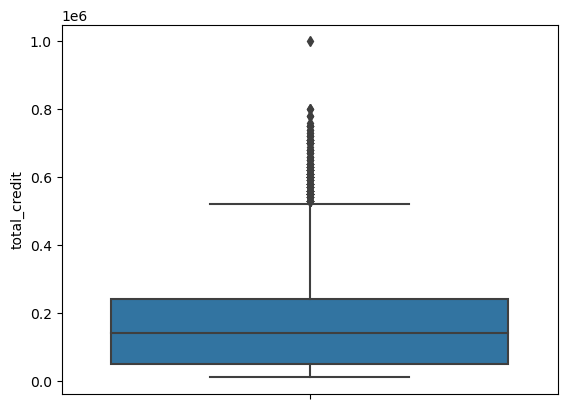

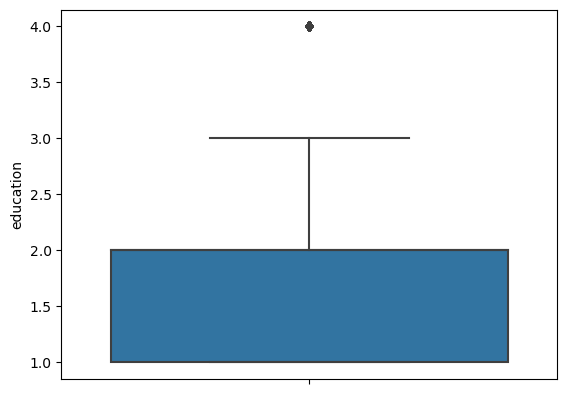

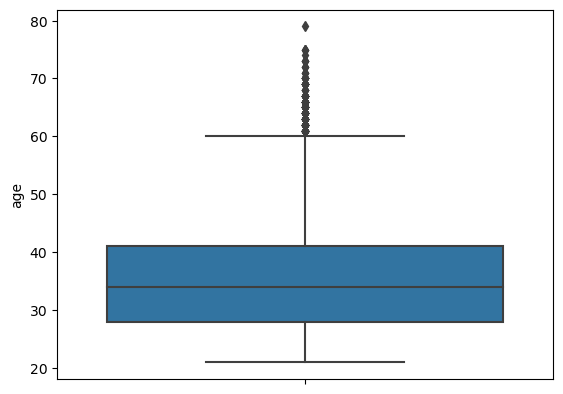

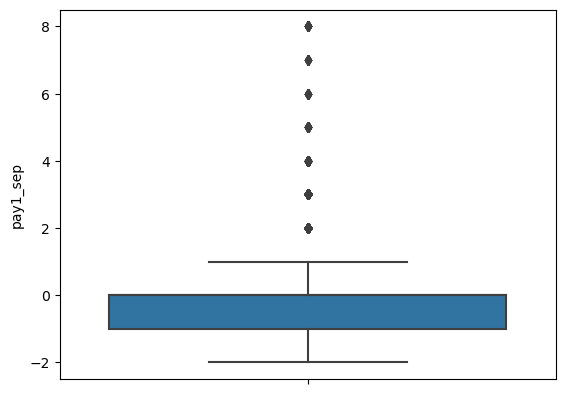

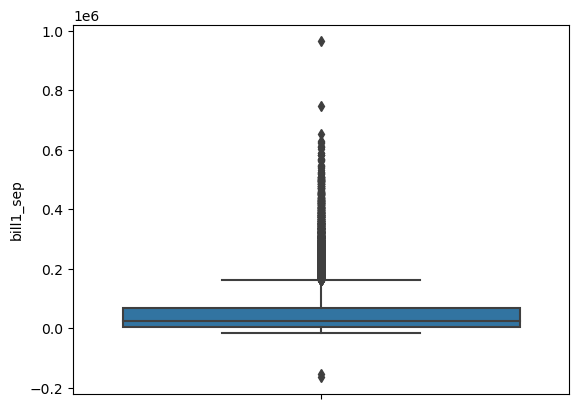

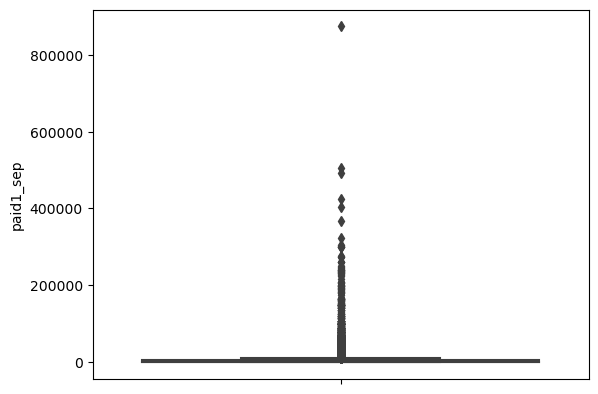

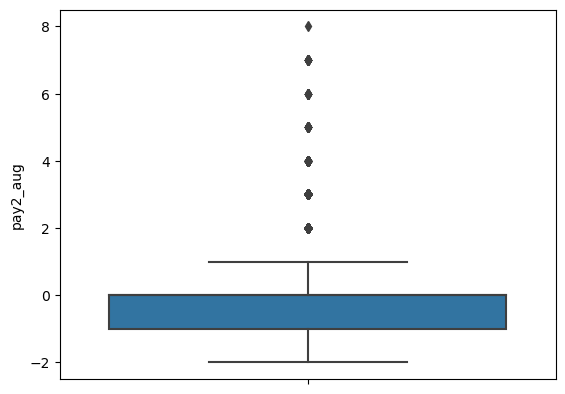

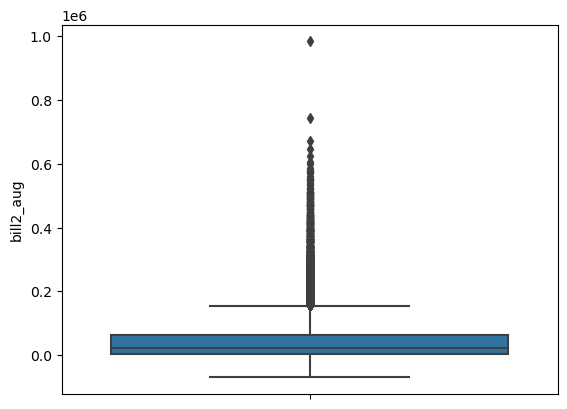

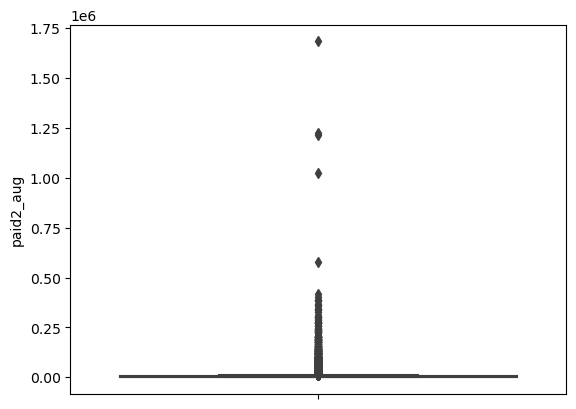

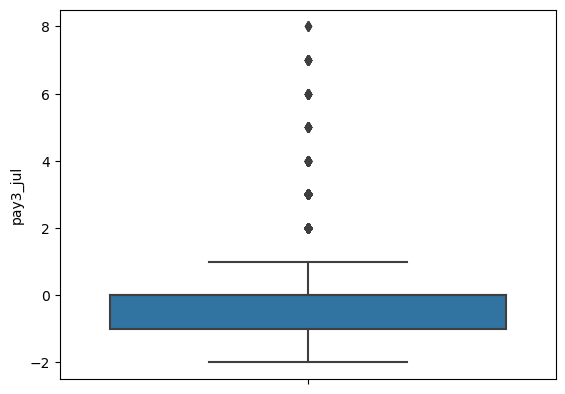

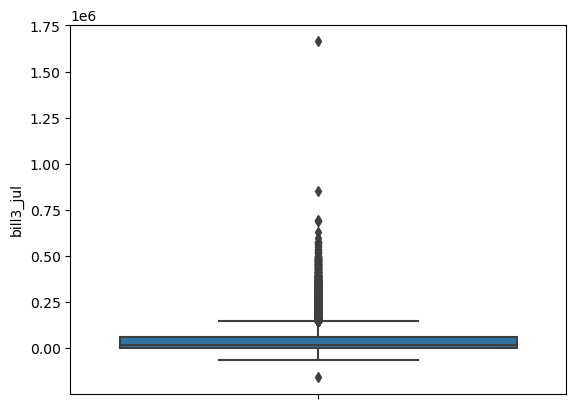

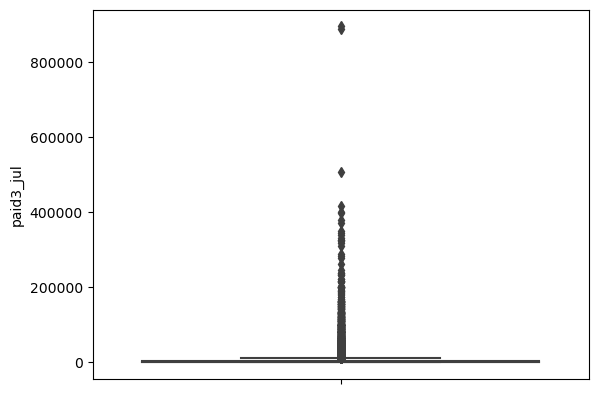

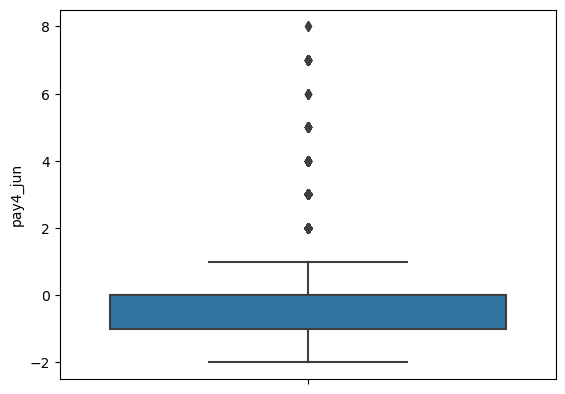

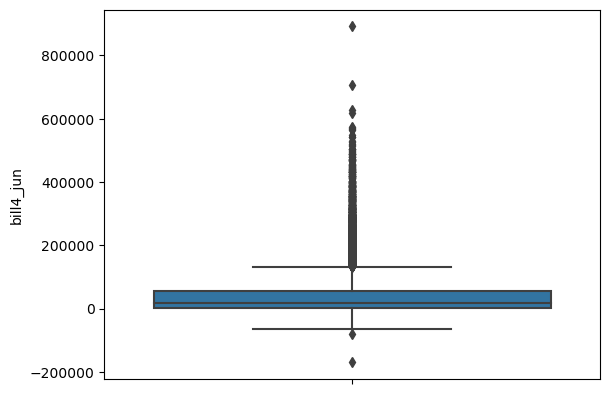

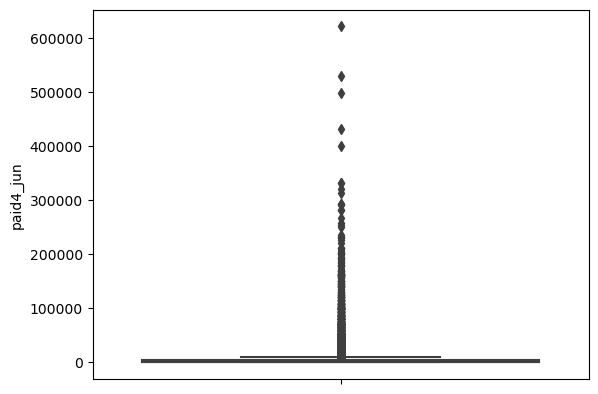

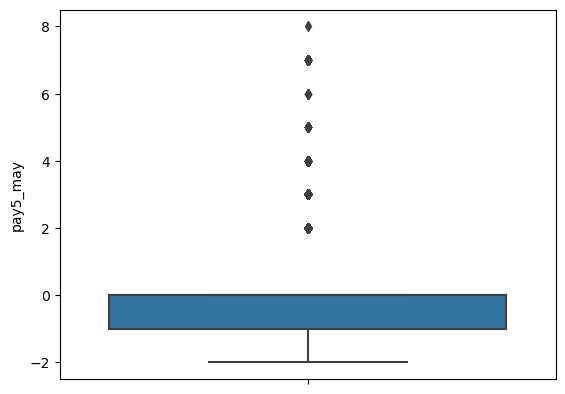

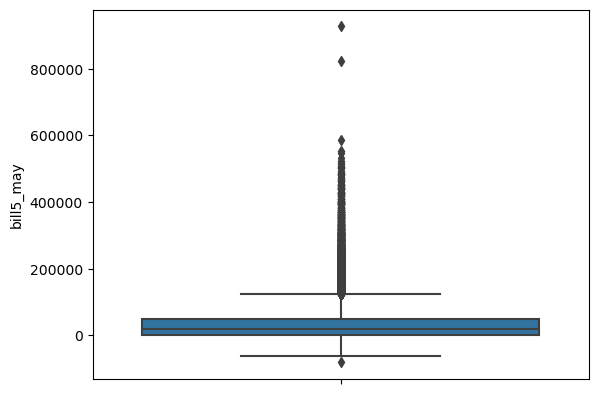

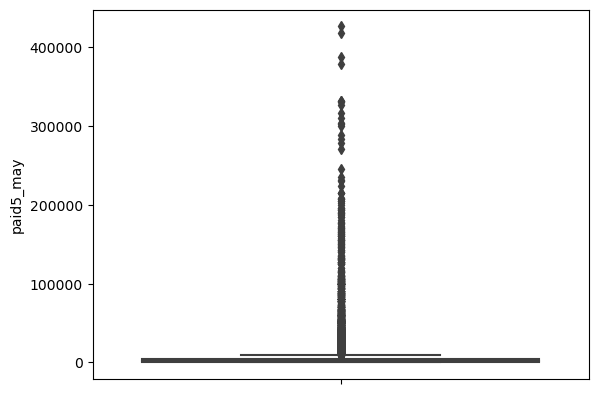

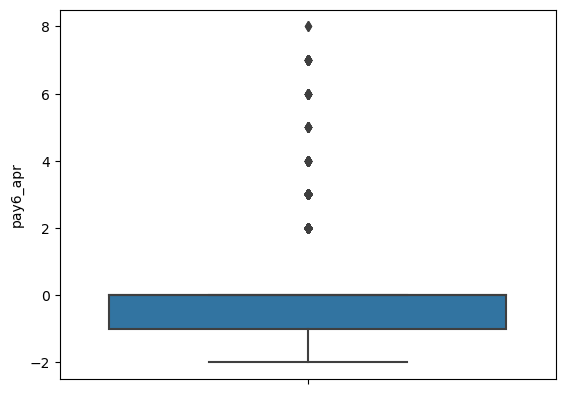

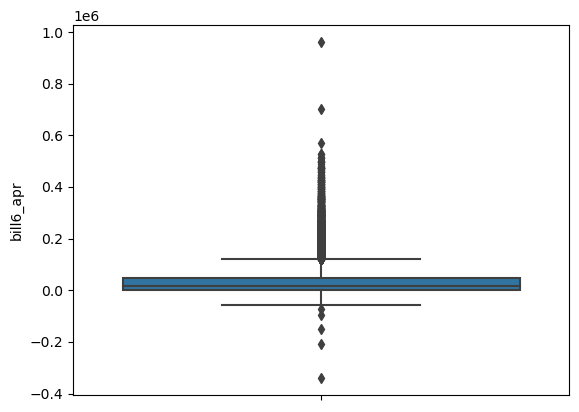

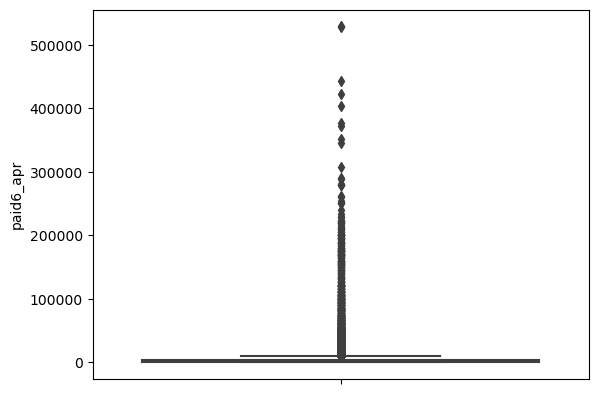

In [14]:
for i in numerical_features:
    sns.boxplot(raw_data, y=i)
    plt.show()

There are many outliers but one of them is too big amount, it can mislead the model

In [15]:
raw_data.drop(raw_data[raw_data['total_credit'] == raw_data['total_credit'].max()].index[0], inplace=True)

### Checking the balance of data

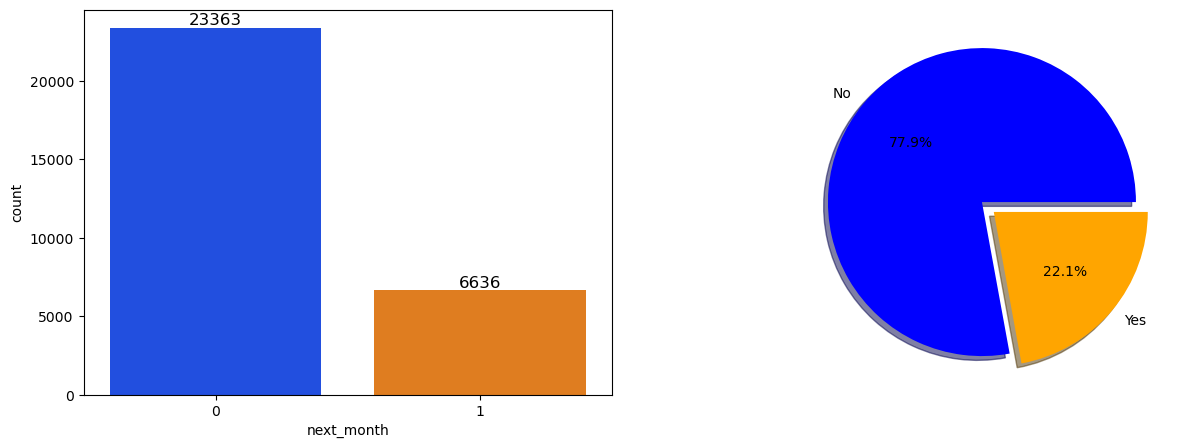

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(raw_data, x='next_month', palette='bright', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
plt.pie(raw_data['next_month'].value_counts(),labels=['No', 'Yes'],colors=['b','orange'], explode=[0,0.1], autopct='%1.1f%%',shadow=True)
plt.show()

as i can see that the data is highly imbalanced

### Balancing the data
    There are two types of sampling technique avaliable Over-sampling and Under-sampling 
    I will use Over-sampling as my dataset is not that much big

##### Naive random over-sampling
    One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:
    In addition, RandomOverSampler allows to sample heterogeneous data (e.g. containing some strings):

In [17]:
from imblearn.over_sampling import RandomOverSampler
random_sampler = RandomOverSampler()

In [18]:
x = raw_data.drop('next_month', axis=1)
y = raw_data.iloc[:, -1]
x_r_samp, y_r_samp = random_sampler.fit_resample(x, y)

In [19]:
from collections import Counter
print(f'Data before sampling {Counter(y)}')
print(f'Data after sampling {Counter(y_r_samp)}')

Data before sampling Counter({0: 23363, 1: 6636})
Data after sampling Counter({1: 23363, 0: 23363})


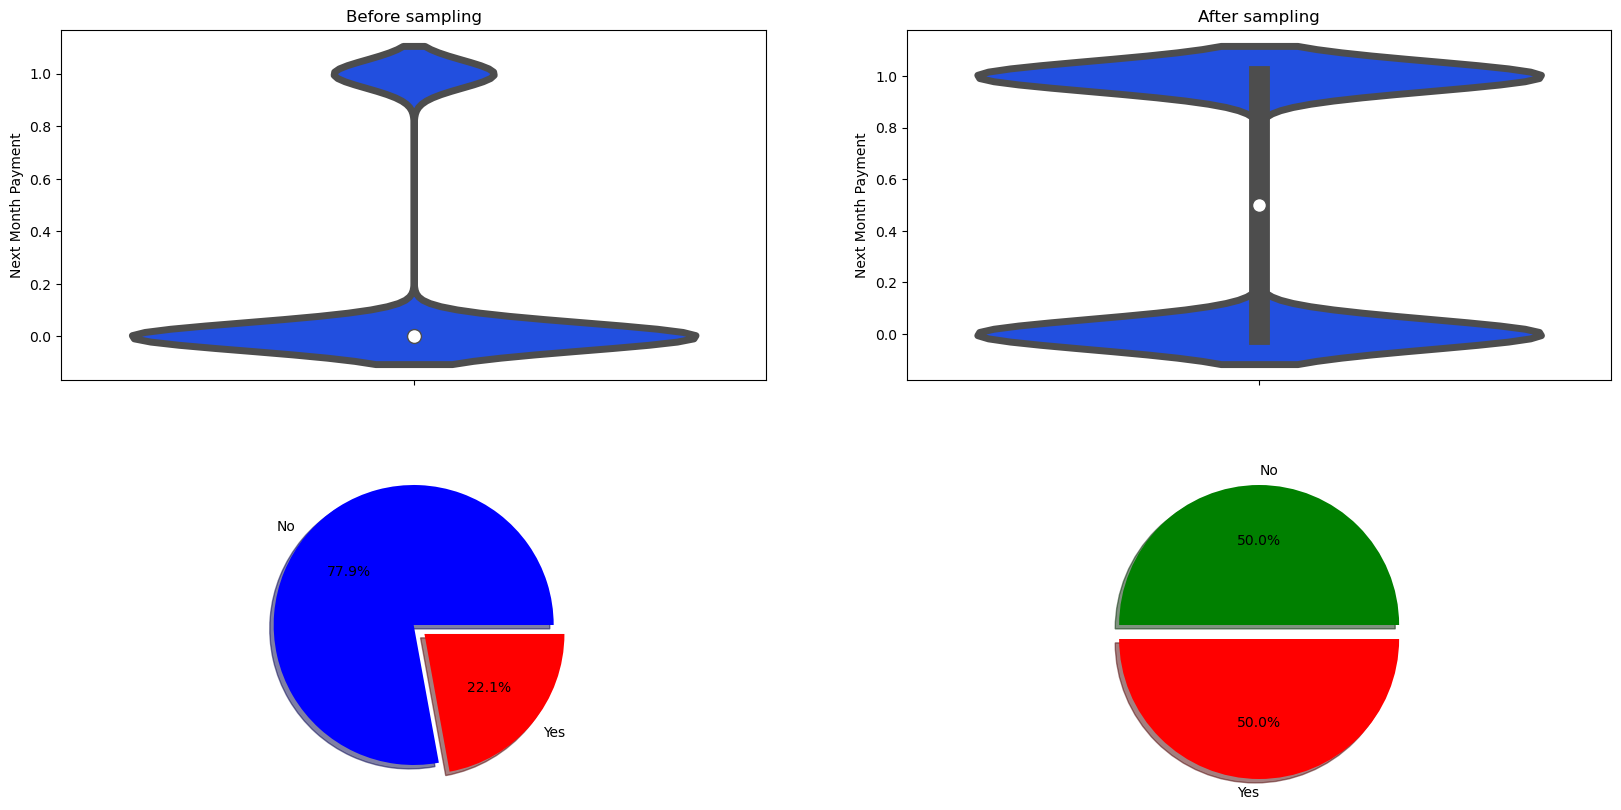

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
sns.violinplot(y=y, scale='count', linewidth=5, palette='bright')
plt.title('Before sampling')
plt.ylabel('Next Month Payment')
plt.subplot(222)
sns.violinplot(y=y_r_samp, linewidth=5, palette='bright')
plt.title('After sampling')
plt.ylabel('Next Month Payment')
plt.subplot(223)
plt.pie(y.value_counts(),labels=['No', 'Yes'],colors=['b','r'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.subplot(224)
plt.pie(y_r_samp.value_counts(),labels=['No', 'Yes'],colors=['g','r'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [21]:
data = x_r_samp.join(y_r_samp)
data.head()

,total_credit,sex,education,marrige,age,pay1_sep,bill1_sep,paid1_sep,pay2_aug,bill2_aug,paid2_aug,pay3_jul,bill3_jul,paid3_jul,pay4_jun,bill4_jun,paid4_jun,pay5_may,bill5_may,paid5_may,pay6_apr,bill6_apr,paid6_apr,next_month
0,20000.0,F,2,married,24,2,3913.0,0.0,2,3102.0,689.0,-1,689.0,0.0,-1,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1
1,120000.0,F,2,single,26,-1,2682.0,0.0,2,1725.0,1000.0,0,2682.0,1000.0,0,3272.0,1000.0,0,3455.0,0.0,2,3261.0,2000.0,1
2,90000.0,F,2,single,34,0,29239.0,1518.0,0,14027.0,1500.0,0,13559.0,1000.0,0,14331.0,1000.0,0,14948.0,1000.0,0,15549.0,5000.0,0
3,50000.0,F,2,married,37,0,46990.0,2000.0,0,48233.0,2019.0,0,49291.0,1200.0,0,28314.0,1100.0,0,28959.0,1069.0,0,29547.0,1000.0,0
4,50000.0,M,2,married,57,-1,8617.0,2000.0,0,5670.0,36681.0,-1,35835.0,10000.0,0,20940.0,9000.0,0,19146.0,689.0,0,19131.0,679.0,0


### Details of Payment and columns: -
    Pay : Repayment status
    Bill : Amount of bill statement
    Paid : Amount of previous payment
    -2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)
    -1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due
    0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance
    1 = payment delay for one month
    2 = payment delay for two months
    . 
    . 
    .
    8 = payment delay for eight months
    9 = payment delay for nine months and above.

In [22]:
data.shape

(46726, 24)

In [23]:
data.to_csv('data.csv', index=False)

### Numerical, Categorical and Target Column

In [24]:
x = data.drop('next_month', axis=1)
y = data.iloc[:, -1]
numerical_features = [i for i in x.columns if x[i].dtype != 'O']
categorical_features = [i for i in x.columns if x[i].dtype == 'O']

In [25]:
data[numerical_features].describe()

,total_credit,education,age,pay1_sep,bill1_sep,paid1_sep,pay2_aug,bill2_aug,paid2_aug,pay3_jul,bill3_jul,paid3_jul,pay4_jun,bill4_jun,paid4_jun,pay5_may,bill5_may,paid5_may,pay6_apr,bill6_apr,paid6_apr
count,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,4.672600e+04,46726.000000,4.672600e+04,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000,46726.000000
mean,154297.929204,1.859265,35.589201,0.226277,50384.558661,4888.247657,0.069062,48599.711488,4.976192e+03,0.020096,4.650083e+04,4537.936866,-0.050122,42963.307730,4241.602876,-0.110345,40123.765848,4302.910542,-0.147284,38820.306510,4595.706780
std,125975.452673,0.731095,9.388605,1.261561,73781.395350,14569.637133,1.339287,71391.870965,1.941317e+04,1.339654,6.941636e+04,15577.533105,1.326332,64610.677447,14186.538416,1.294422,61059.150955,14657.193585,1.300684,59717.029527,16386.302589
min,10000.000000,1.000000,21.000000,-2.000000,-165580.000000,0.000000,-2.000000,-69777.000000,0.000000e+00,-2.000000,-1.572640e+05,0.000000,-2.000000,-170000.000000,0.000000,-2.000000,-81334.000000,0.000000,-2.000000,-339603.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,3388.000000,390.000000,-1.000000,2855.000000,3.900000e+02,-1.000000,2.551000e+03,192.000000,-1.000000,2234.500000,7.000000,-1.000000,1650.000000,0.000000,-1.000000,1221.250000,0.000000
50%,120000.000000,2.000000,34.000000,0.000000,21332.500000,2000.000000,0.000000,20669.000000,2.000000e+03,0.000000,1.990000e+04,1520.000000,0.000000,19031.000000,1238.500000,0.000000,18200.000000,1308.000000,0.000000,17398.500000,1213.000000
75%,220000.000000,2.000000,42.000000,1.000000,64523.000000,4600.000000,0.000000,61763.000000,4.412750e+03,0.000000,5.871825e+04,4000.000000,0.000000,52648.000000,3613.750000,0.000000,49318.000000,3653.000000,0.000000,48720.750000,3550.000000
max,800000.000000,4.000000,79.000000,8.000000,746814.000000,873552.000000,8.000000,743970.000000,1.684259e+06,8.000000,1.664089e+06,889043.000000,8.000000,706864.000000,621000.000000,8.000000,823540.000000,426529.000000,8.000000,699944.000000,528666.000000


In [26]:
data[categorical_features].describe()

,sex,marrige
count,46726,46726
unique,2,4
top,F,single
freq,27513,24336


# Univariate Analysis

### Total Credit to Sex, Education, Marrige

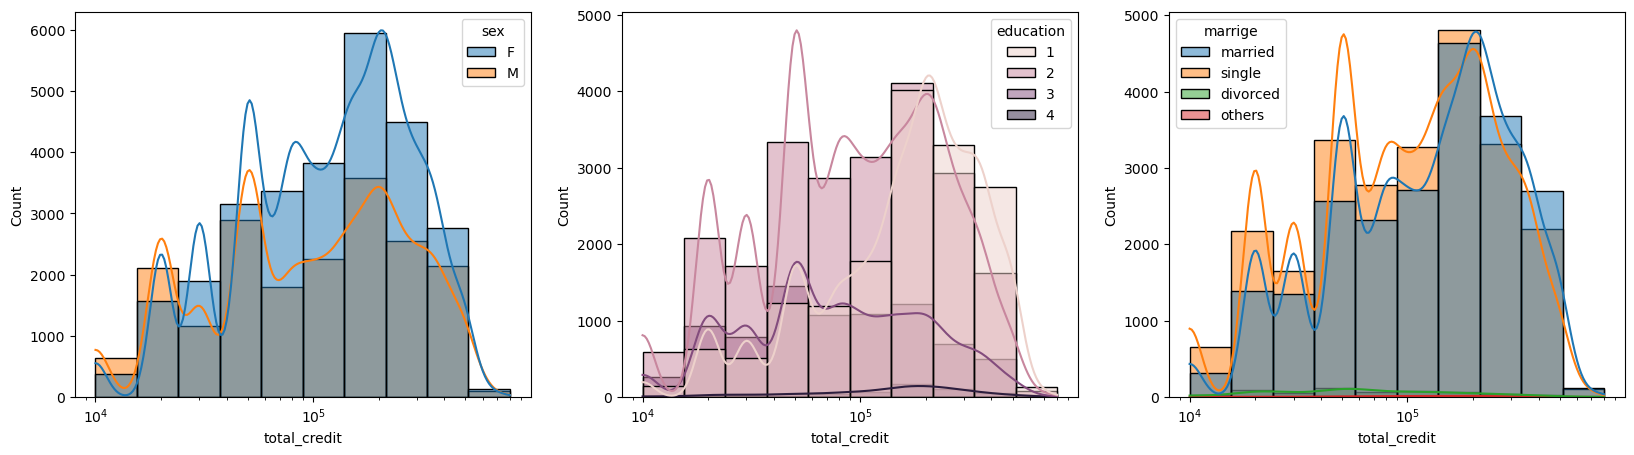

In [135]:
ax, fig = plt.subplots(figsize=(20, 5))

plt.subplot(131)
sns.histplot(data, x='total_credit', hue='sex', kde=True, bins=10, log_scale=True)

plt.subplot(132)
sns.histplot(data, x='total_credit', hue='education', kde=True, bins=10, log_scale=True)

plt.subplot(133)
sns.histplot(data, x='total_credit', hue='marrige', kde=True, bins=10, log_scale=True)

plt.show()

##### From the plots: -
    Females have taken more credit then male
    Educated from university and graduation college total taken credit amount is almost same
    Married and Singles total taken credit amount is almost same

### Credit amount to Default payment

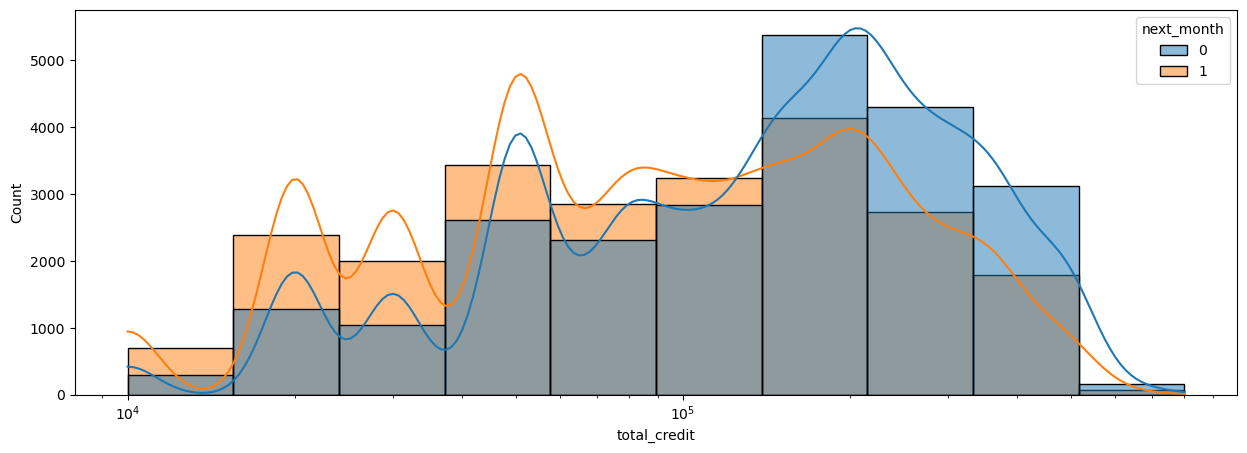

In [149]:
plt.figure(figsize=(15, 5))
sns.histplot(data, x='total_credit', hue='next_month', kde=True, bins=10, log_scale=True)
plt.show()

The more total credit drives to more no pay next month

### Age group to total credit

In [28]:
age_df = data[['age', 'total_credit', 'next_month']]
labels = ['20-30 Twenties', '30-40 Young', '40-60 Mid-age', '60-100 Old']
bins = [20, 30, 40, 60, 100]
age_df['bins'] = pd.cut(age_df['age'], labels=labels, bins=bins)

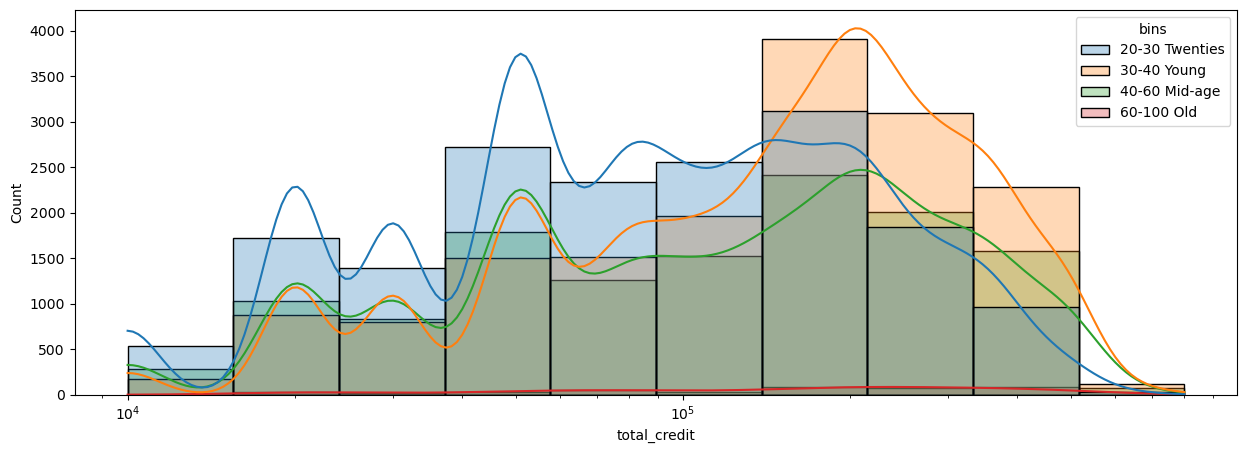

In [29]:
plt.figure(figsize=(15, 5))
sns.histplot(age_df, x='total_credit', hue='bins', kde=True, bins=10, alpha=0.3, log_scale=True)
plt.show()

The age group of 30-40 has highest total taken credit and then 20-30 is second highest

### Next month pay to age group

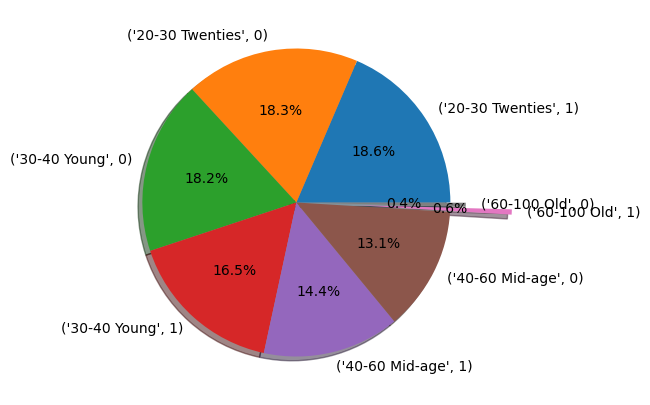

In [119]:
plt.figure(figsize=(15, 5))
plt.pie(age_df.groupby('bins')['next_month'].value_counts(), 
        labels=age_df.groupby('bins')['next_month'].value_counts().index,
        autopct='%1.1f%%', shadow=True, explode=[0,0,0,0,0,0,0.4,0.1])
plt.show()

### Next month pay to sex, education, marrige

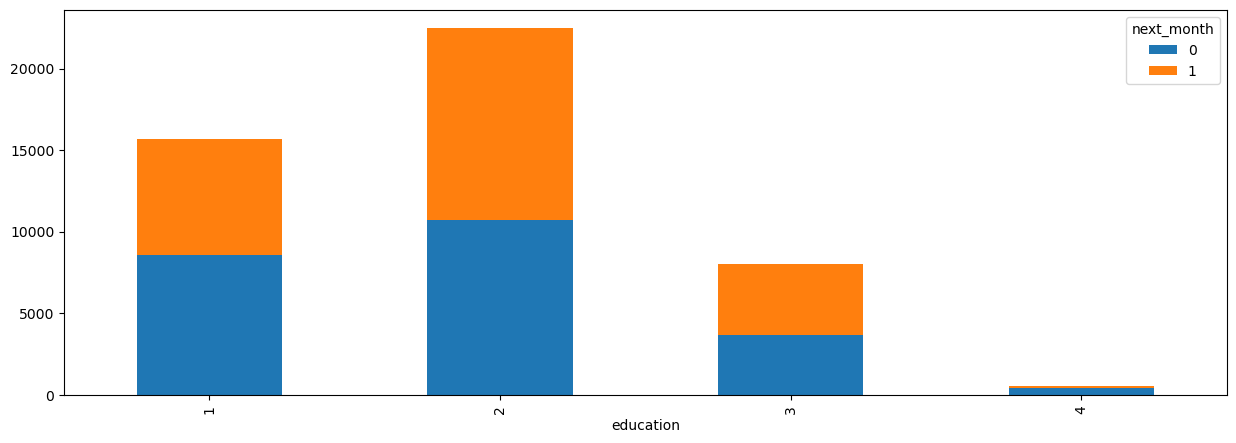

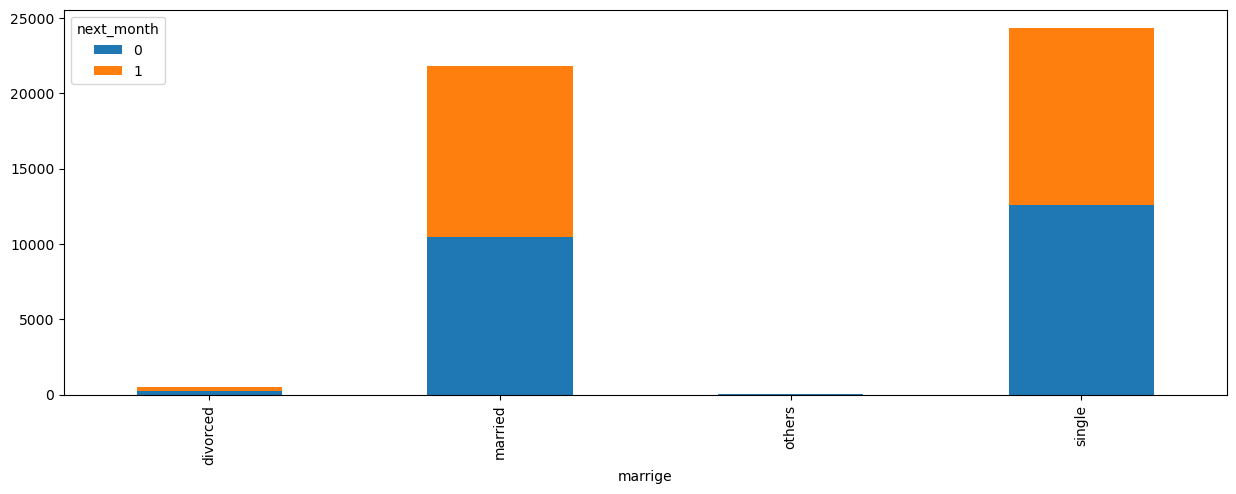

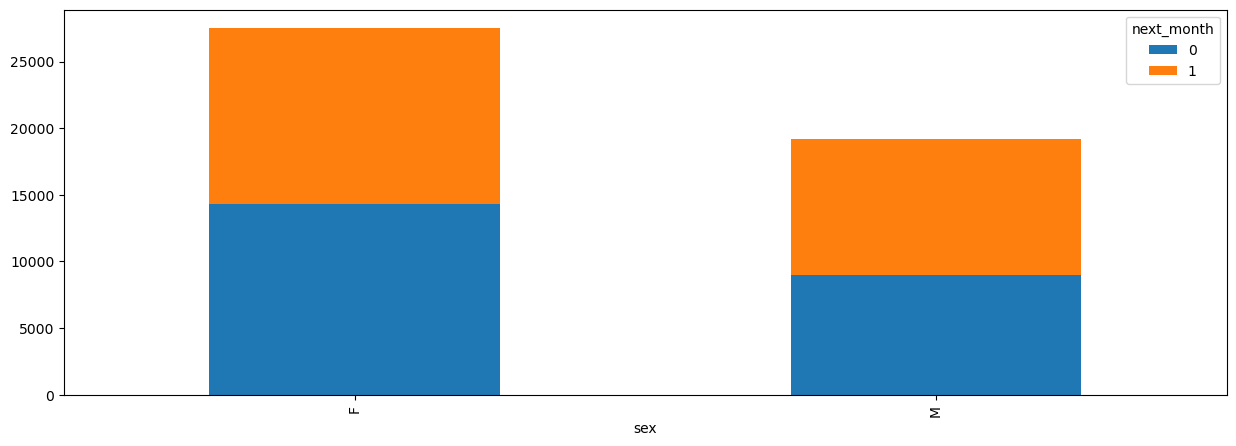

In [134]:
df_edu = data.groupby(['education', 'next_month']).size().unstack()
df_edu.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

df_edu = data.groupby(['marrige', 'next_month']).size().unstack()
df_edu.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

df_edu = data.groupby(['sex', 'next_month']).size().unstack()
df_edu.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

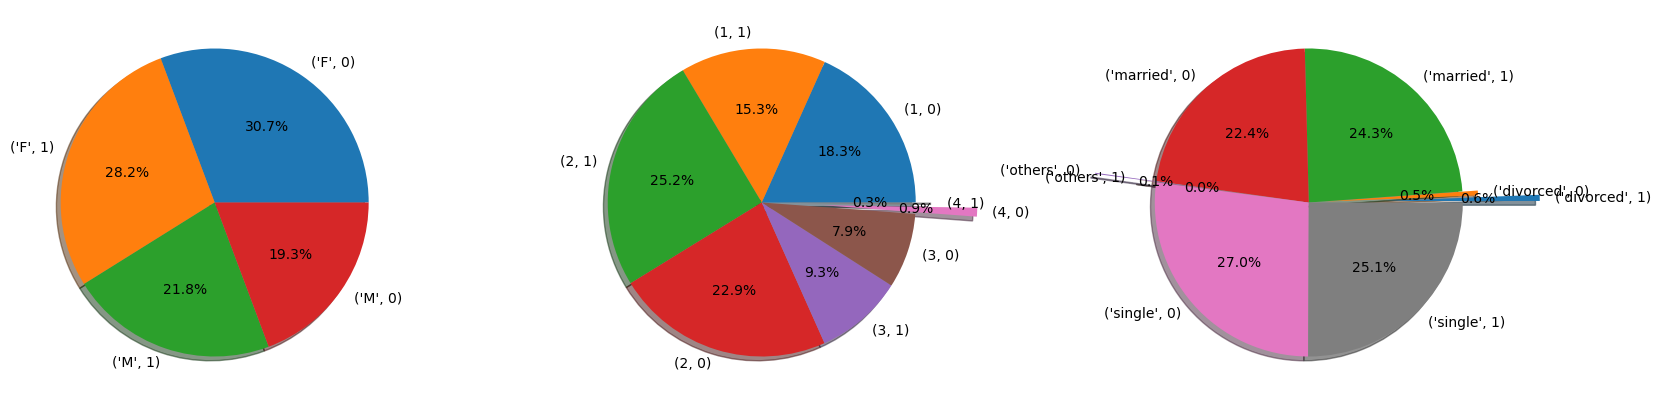

In [104]:
ax, fig = plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.pie(data.groupby('sex')['next_month'].value_counts(), 
        labels=data.groupby('sex')['next_month'].value_counts().index, 
        autopct='%1.1f%%', shadow=True, explode=[0,0,0,0])

plt.subplot(132)
plt.pie(data.groupby('education')['next_month'].value_counts(), 
        labels=data.groupby('education')['next_month'].value_counts().index,
        autopct='%1.1f%%', shadow=True, explode=[0,0,0,0,0,0,0.4,0.1])

plt.subplot(133)
plt.pie(data.groupby('marrige')['next_month'].value_counts(), 
        labels=data.groupby('marrige')['next_month'].value_counts().index, 
        autopct='%1.1f%%', shadow=True, explode=[0.5,0.1,0,0,0.4,0.1,0,0])

plt.show()

### Multivariate analysis

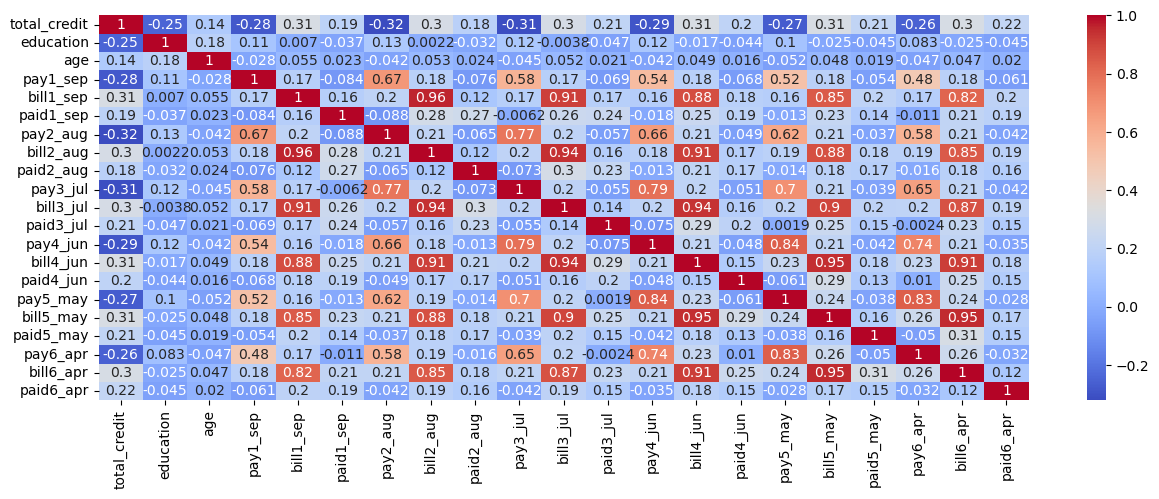

In [35]:
plt.figure(figsize=(15, 5))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()